In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\tanch\Documents\URECA\Models Downloaded.csv.txt")
df

,models
0,albert-base-v1
1,albert-xlarge-v1
2,bert-base-uncased
3,bert-base-cased
4,distilbert-base-uncased
5,roberta-base
6,distilroberta-base
7,google/electra-base-discriminator
8,squeezebert/squeezebert-uncased
9,microsoft/deberta-base


In [3]:
from transformers import AutoModelForQuestionAnswering
import numpy as np

In [4]:
model_num_params = []
for model in df.models:
    try:
        model = AutoModelForQuestionAnswering.from_pretrained(model)
        model_num_params.append(model.num_parameters()) 
    except: 
        model_num_params.append(np.nan) 

Some weights of the model checkpoint at albert-base-v1 were not used when initializing AlbertForQuestionAnswering: ['predictions.bias', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForQuestionAnswering were not initialized from the model checkpoint at albert-base-v1 and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN t

Some weights of ElectraForQuestionAnswering were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of the model checkpoint at squeezebert/squeezebert-uncased were not used when initializing SqueezeBertForQuestionAnswering: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing SqueezeBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT e

In [5]:
dict(zip(df.models,model_num_params))

{'albert-base-v1': 11094530,
 'albert-xlarge-v1': 54532610,
 'bert-base-uncased': 108893186,
 'bert-base-cased': 107721218,
 'distilbert-base-uncased': 66364418,
 'roberta-base': 124056578,
 'distilroberta-base': 81529346,
 'google/electra-base-discriminator': 108893186,
 'squeezebert/squeezebert-uncased': 51095810,
 'microsoft/deberta-base': nan}

<AxesSubplot:xlabel='num_params', ylabel='model_name'>

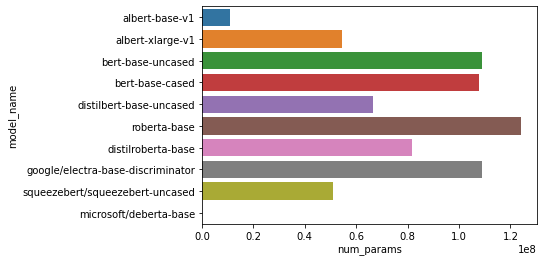

In [6]:
import seaborn as sb
temp_df = pd.DataFrame({"model_name":df.models,
                        "num_params":model_num_params})
sb.barplot(data = temp_df,
           y = 'model_name',
           x = 'num_params')